<a href="https://colab.research.google.com/github/yandri918/Belajar-python/blob/pandas/Crop_Recommendation_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Drop the non-numeric column 'label'
correlation_matrix = crop.drop('label', axis=1).corr()

# Display correlation matrix
print(correlation_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


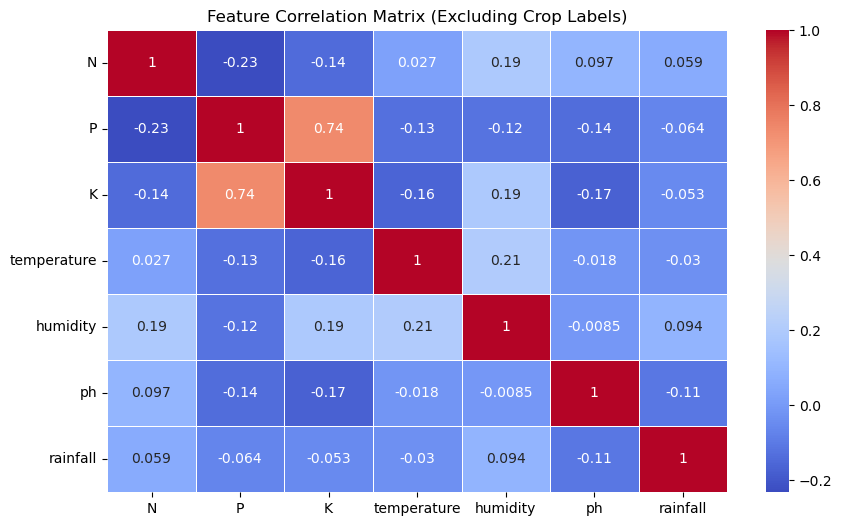

In [ ]:
# Optional: Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix (Excluding Crop Labels)')
plt.show()

In [ ]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
crop['label'].unique().size

22

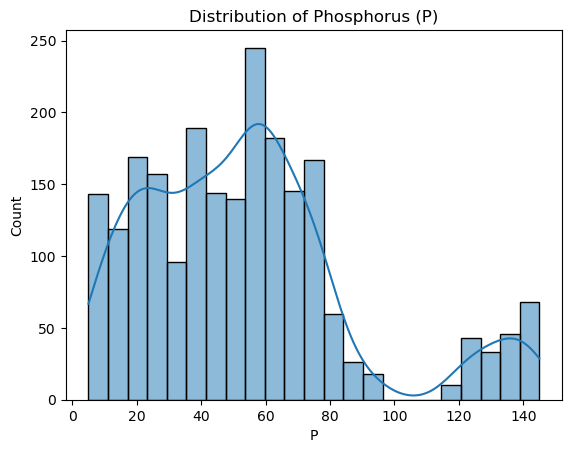

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=crop, x='P', kde=True)  # Add kde=True if you want the density curve
plt.title('Distribution of Phosphorus (P)')
plt.show()

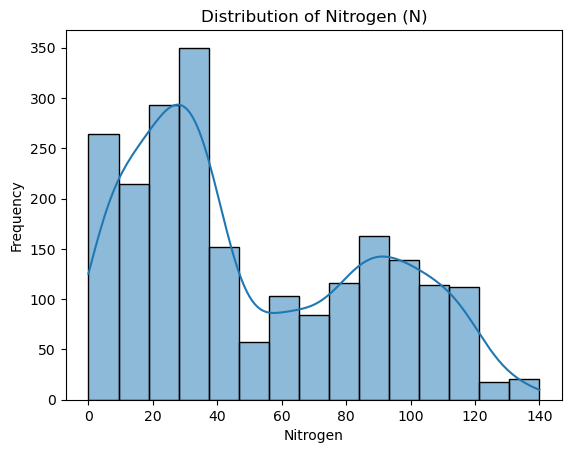

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=crop, x='N', kde=True)
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

In [ ]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [ ]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [ ]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [ ]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [ ]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9590909090909091
DecisionTreeClassifier model with accuracy: 0.9840909090909091
ExtraTreeClassifier model with accuracy: 0.8681818181818182
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818


C:\Users\123\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.09545454545454546


In [ ]:
randclf = GaussianNB()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9954545454545455